# Clustering With K-Means

Untangle complex spatial relationships with cluster labels.

In this notebook we make use of **unsupervised learning** to learn some property of the data using it as a "feature discovery" technique.

**Clustering** simply means the assigning of data points to groups based on upon how similar the points are to each other. When used for feature engineering, we could attempt to discover groups of customers representing a market segment, for instance, or geographic areas that share similar weather patterns. Adding a feature of cluster labels can help machine learning models untangle complicated relationships of space or proximity.

### Cluster labels as a Feature

- Applied to a single real-valued feature, clustering acts like a "binning" or "discretization" transform.
- On multiple features, it is like "multi-dimensional binning" - also known as "vector quantization"

![](images/2022-06-14-15-00-39.png)

This `cluster` feature is categorical thus `label encoded` feature. Depending on your model, a one-hot encoding may be more appropriate. The motivating idea for adding cluster labels is that the clusters will break up complicated relationships across features into simpler chunks. It is a "divide and conquer" strategy.

### K-Means Clustering

There are several clustering algorithms, which differ primarily in how they measure "similarity" or "proximity" and in what kinds of features they work with. An algorithm well known as frequently used is **k-means**, since it is intuitive and easy to apply in this context. Depending on your application another algorithm might be more appropriate.

**K-means clustering** measures similarity using ordinary straight-line distance ([Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)).
1. It creates clusters by placing a number of points - **centroids** - inside a feature-space;
2. Each point is assigned to the cluster of whichever centroid it is closest to;
3. The "k" is how many centroids it creates - define by the **user**.
4. You could imagine each centroid capturing points through a sequence of radiating circles;
5. When sets of circles from competing centroids overlap they form a boderline - knows as [Voronoi Tessallation](https://en.wikipedia.org/wiki/Voronoi_diagram);
6. The Voronoi Tessallation shows you to what clusters future data is assigned (It is essentially what **k-means** learns from training);

Let's review how **k-means** works based on 3 parameters (`n_clusters`, `max_iter`, and `n_init`):
1. The algorithms starts by randomly initializing some predefined number of centroids;
2. It then iterates over two operations:
    
    a) assign points to the nearest cluster centroid;
    
    b) move each centroid to minimize the distance to its points 

3. It iterates until the centroids aren't moving anymore or the `max_iter` has passed;


**Notes:**
- You may need to increase `max_iter` for larger number of clusters or `n_init` for a complex dataset.
- You will need to choose the `n_clusters` and this is highly related with what you are trying to predict or discover, so it is best to tune it like any hyperparameter (cv) 

#### Example: California Housing

In [3]:
# ! kaggle datasets download -d camnugent/california-housing-prices

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("data/housing.csv")
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


It is important to scale features when using clustering, but since our features already have the same scale we will not need to do it. Remember that features with larger values will be weighted more heavily.

In [12]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,median_income,latitude,longitude,Cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,0


Now lets look at a couple plots to see how effective it was:

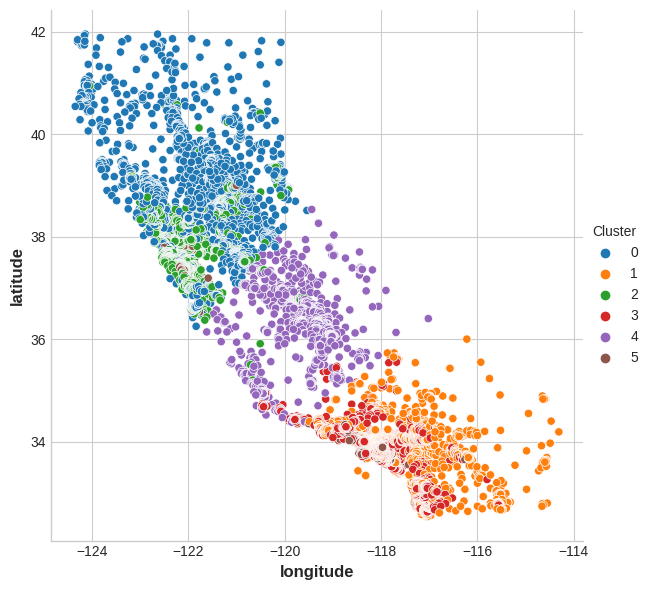

In [13]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
);

The target in this dataset is: **Median House Val**. These box-plots show the distribution of the target within each cluster. If the clustering is informative, there distributions should, for the most part, separate the target.

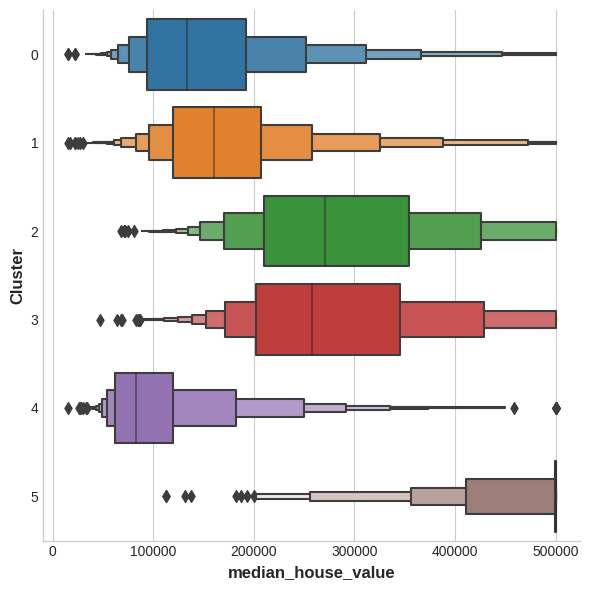

In [16]:
X["median_house_value"] = df["median_house_value"]
sns.catplot(x="median_house_value", y="Cluster", data=X, kind="boxen", height=6);

### Cluster-Distance Features

The k-means algorithm offers an alternative way of creating features. Instead of labelling each feature with the nearest cluster centroid, it can measure the distance from a point to all the centroids and return those distances as features. Check Kaggle Exercises Clustering with K-means notebook for an example.